### Name: HeeSeung Park (Joseph)
Task for this assigment: 
1. Apply various Scikit Learn SVM Kernel Classifier to the Iris dataset and upload your notebook. 
2. You can use the code we ran in class from the scikit learn documentation as your starting point. 
3. Use a number of different kernels and compare the results you get with them.
    1. SVC with linear kernel
    2. SVC with RBF kernel
    3. SVC with polynomial degree (try different degrees)
    4. SVC with sigmoid 
    5. LinearSVC

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Two features each test for six total cases
1. Sepal Length vs. Sepal Width (0,1)
2. Sepal Length vs. Petal Length (0,2)
3. Sepal Length vs. Petal Width (0,3)
4. Sepal Width vs. Petal Length (1,2)
5. Sepal Width vs. Petal Width (1,3)
6. Petal Length vs. Petal Width (2,3)


In [1]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
#from graphviz import Digraph  

In [2]:
print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
def make_meshgrid(x, y, h=.01):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [4]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [5]:
features = [
    'Sepal Length',
    'Sepal Width',
    'Petal Length',
    'Petal Width'
]

cases = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

In [6]:
case1_X = iris.data[:,cases[0]]
case2_X = iris.data[:,cases[1]]
case3_X = iris.data[:,cases[2]]
case4_X = iris.data[:,cases[3]]
case5_X = iris.data[:,cases[4]]
case6_X = iris.data[:,cases[5]]

In [7]:
result_table = []

In [8]:
case1_result = []
case2_result = []
case3_result = []
case4_result = []
case5_result = []
case6_result = []

In [9]:
titles = ('SVC with Linear Kernel', 
          'SVC with RBF Kernel',
          'SVC with Poly Kernel degree = 3',
          'SVC with Poly Kernel degree = 4',
          'SVC with Poly Kernel degree = 5', 
          'SVC with Poly Kernel degree = 6', 
          'SVC with Sigmoid Kernel',
          'LinearSVC (Linear kernel)')

In [18]:
def svm_graph(X, whichcase):
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, C=C),
              svm.SVC(kernel='poly', degree=4, C=C),
              svm.SVC(kernel='poly', degree=5, C=C),
              svm.SVC(kernel='poly', degree=6, C=C),
              svm.SVC(kernel='sigmoid', C=C),
              svm.LinearSVC(C=C))

    global y, features, titles, result_table
    models = (clf.fit(X, y) for clf in models)
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(nrows=4, ncols=2, figsize= (8,8))
    plt.subplots_adjust(wspace=0.4, hspace=0.5)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        result_table.append(clf.score(X,y))
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(features[whichcase[0]])
        ax.set_ylabel(features[whichcase[1]])
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()
    

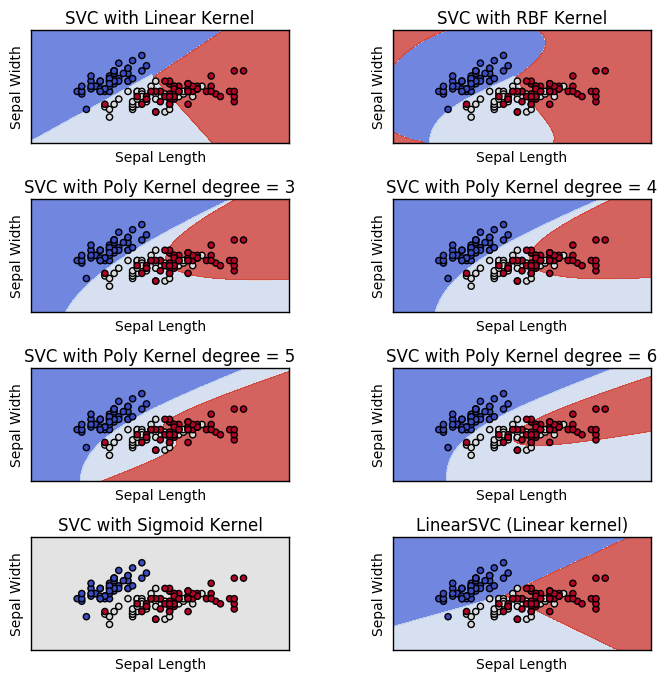

In [19]:
# Case 1
svm_graph(case1_X, cases[0])

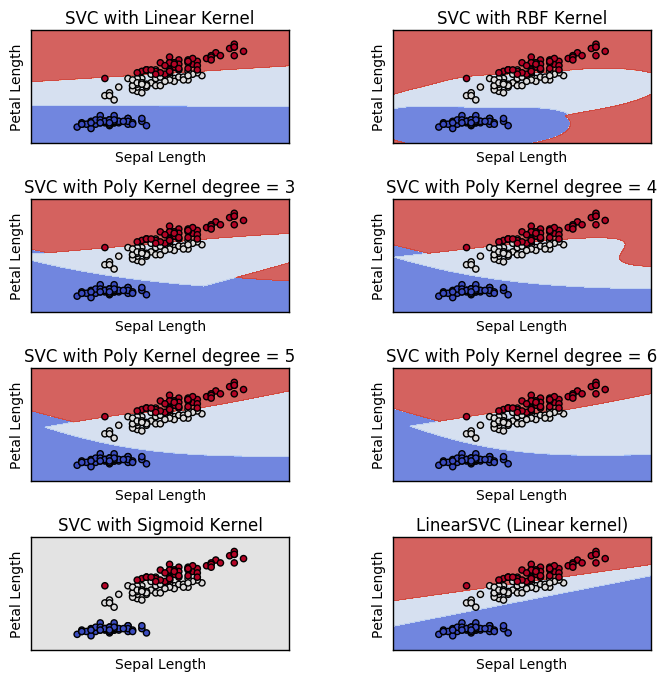

In [21]:
# Case 2
svm_graph(case2_X, cases[1])

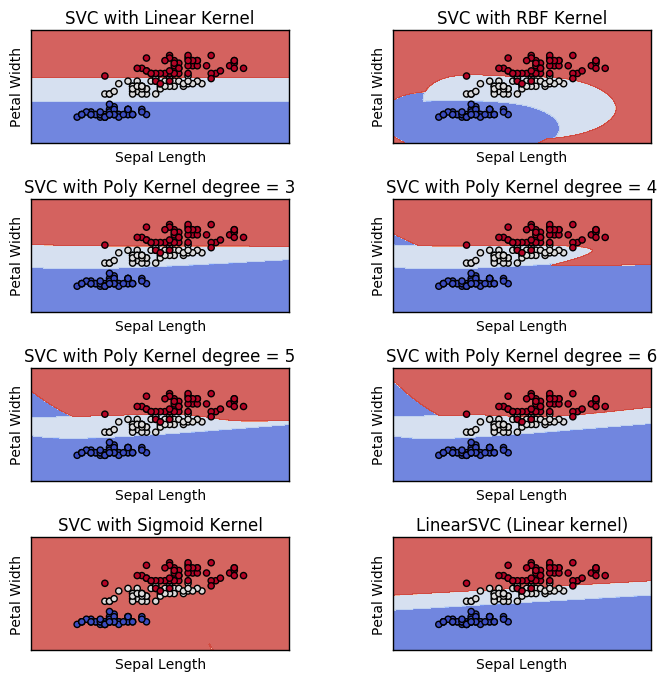

In [22]:
# Case 3
svm_graph(case3_X, cases[2])

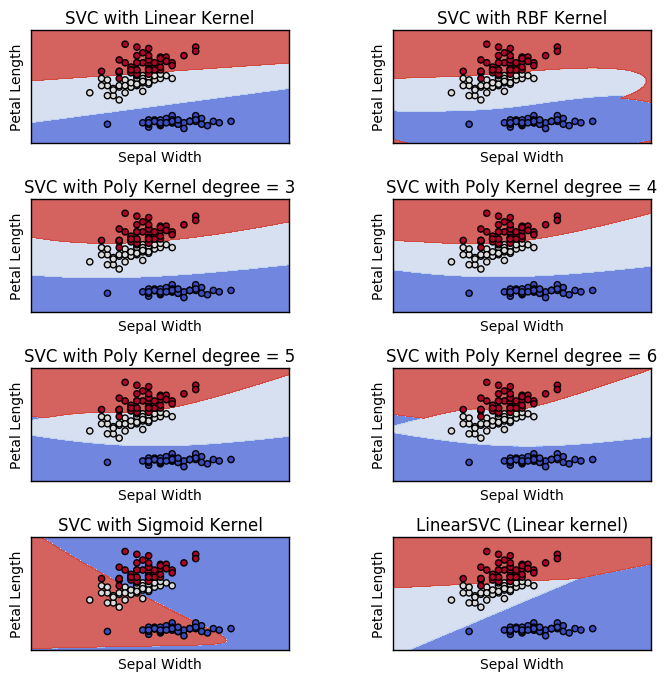

In [23]:
# Case 4
svm_graph(case4_X, cases[3])

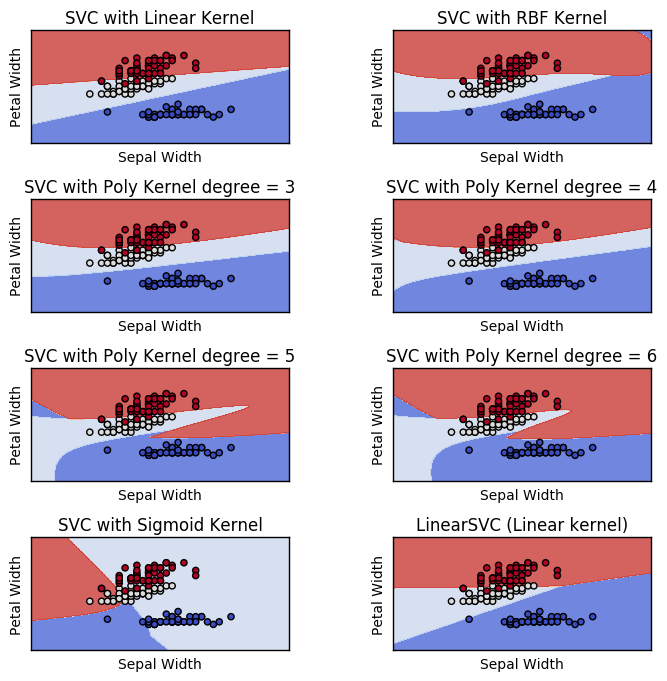

In [24]:
# Case 5
svm_graph(case5_X, cases[4])

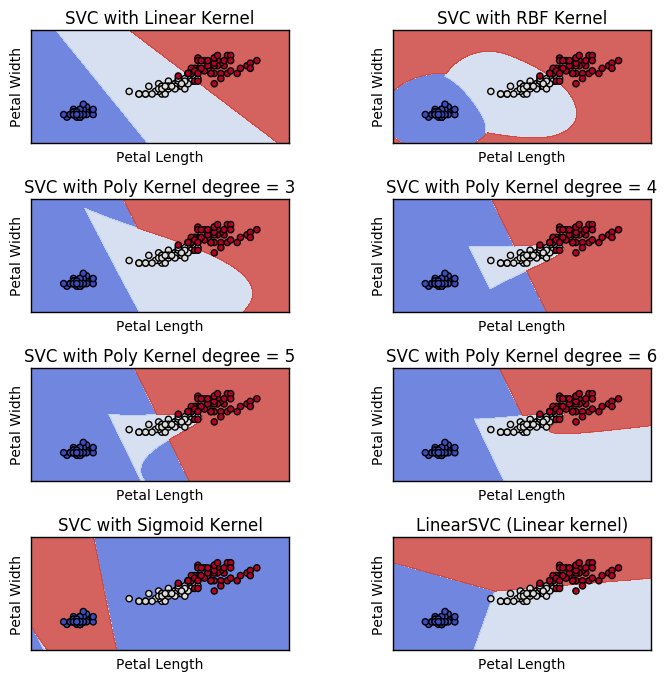

In [25]:
# Case 6
svm_graph(case6_X, cases[5])

# Result

In [38]:
from tabulate import tabulate

final_result = []
a = 0
b = 0
for i in result_table:
    case = features[cases[b%5][0]] + " & " + features[cases[b%5][1]]
    final_result.append([case, titles[a%7], i])
    a += 1
    b += 1
final_result

print(tabulate(final_result, headers=["Case", "Type of SVM", "Accuracy"]))

Case                         Type of SVM                        Accuracy
---------------------------  -------------------------------  ----------
Sepal Length & Sepal Width   SVC with Linear Kernel            0.82
Sepal Length & Petal Length  SVC with RBF Kernel               0.826667
Sepal Length & Petal Width   SVC with Poly Kernel degree = 3   0.813333
Sepal Width & Petal Length   SVC with Poly Kernel degree = 4   0.806667
Sepal Width & Petal Width    SVC with Poly Kernel degree = 5   0.813333
Sepal Length & Sepal Width   SVC with Poly Kernel degree = 6   0.786667
Sepal Length & Petal Length  SVC with Sigmoid Kernel           0.333333
Sepal Length & Petal Width   SVC with Linear Kernel            0.8
Sepal Width & Petal Length   SVC with RBF Kernel               0.953333
Sepal Width & Petal Width    SVC with Poly Kernel degree = 3   0.96
Sepal Length & Sepal Width   SVC with Poly Kernel degree = 4   0.966667
Sepal Length & Petal Length  SVC with Poly Kernel degree = 5   0.973333
Sep

## Result Average

In [45]:
#Linear Kernel
n = 0
for i in titles:
    average = sum(result_table[n::7])/8
    print(i + " Accuracy Average is: " + str(average))
    n += 1


SVC with Linear Kernel Accuracy Average is: 0.723333333333
SVC with RBF Kernel Accuracy Average is: 0.7425
SVC with Poly Kernel degree = 3 Accuracy Average is: 0.7025
SVC with Poly Kernel degree = 4 Accuracy Average is: 0.736666666667
SVC with Poly Kernel degree = 5 Accuracy Average is: 0.700833333333
SVC with Poly Kernel degree = 6 Accuracy Average is: 0.816666666667
SVC with Sigmoid Kernel Accuracy Average is: 0.644166666667
LinearSVC (Linear kernel) Accuracy Average is: 0.620833333333


### From my research using eight different source vector machine models from scikitlearn python library (SVC with linear, rbf, polynomial degree 3 4 5 6, sigmoid, and LinearSVC), I have employed these eight different models to see the performance of Iris flower classification. There are 4 features in Iris Dataset, and to make our visualization easier, I chose 2 features at a time (6 cases in total). The result showed that Source Vector Machine with the Polynomial Kernel Degree of 6 had the best accuracy average of 81.6%. On the other hand, the worst performing model was LinearSVC (linear kernel) that yielded accuracy average of 62%.

### In the future, I plan to explore Nu-Support Vector Classification from Scikitlearn after finding out how this differs from the traditional SVM. What I have learned so far is that Nu-Support Vector Classification is similar to SVC but uses a parameter to control the number of support vectors.